In [2]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
ruta='datos/'
df_train_three=joblib.load(ruta+'df_train_datos2.pkl')
df_xtest_three=joblib.load(ruta+'df_xtest_datos2.pkl')
scaler = StandardScaler()

X=df_train_three.loc[:,~df_train_three.columns.isin(['target_duo', 'target_trio'])]
X_real_test=df_xtest_three.loc[:,~df_xtest_three.columns.isin(['target_duo', 'target_trio'])]
y2=df_train_three.loc[:,df_train_three.columns.isin(['target_duo'])]
y3=df_train_three.loc[:,df_train_three.columns.isin(['target_trio'])]

scaler.fit(X)
X=scaler.transform(X)


scaler = StandardScaler()
scaler.fit(X_real_test)
X_real_test=scaler.transform(X_real_test)

test_size=0.7
random_state=1000
X_train2, X_test2, y_train_2, y_test_2 = train_test_split(X, y2, test_size=test_size, random_state=random_state)
X_train3, X_test3, y_train_3, y_test_3 = train_test_split(X, y3, test_size=test_size, random_state=random_state)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# creamos clasificador
rfc = RandomForestClassifier(n_estimators=900, n_jobs = -1)
print("clasificador exitoso")

# entrenamos clasificador
rfc.fit(X_train2, y_train_2.values.ravel())
print("entrenamiento exitoso")

#predecimos
y_test_pred2=rfc.predict(X_test2)
print("predicción realizada")

# Accuracy
accuracy = accuracy_score(y_test_pred2, y_test_2)
print("Accuracy = " + str(accuracy))

# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test_pred2, y_test_2))
print(classification_report(y_test_pred2, y_test_2))

clasificador exitoso
entrenamiento exitoso
predicción realizada
Accuracy = 0.511685967814709
[[11489  9621]
 [ 6613  5522]]
              precision    recall  f1-score   support

           0       0.63      0.54      0.59     21110
           1       0.36      0.46      0.40     12135

    accuracy                           0.51     33245
   macro avg       0.50      0.50      0.50     33245
weighted avg       0.54      0.51      0.52     33245



In [5]:
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test_pred2, y_test_2))
print(classification_report(y_test_pred2, y_test_2))

[[11489  9621]
 [ 6613  5522]]
              precision    recall  f1-score   support

           0       0.63      0.54      0.59     21110
           1       0.36      0.46      0.40     12135

    accuracy                           0.51     33245
   macro avg       0.50      0.50      0.50     33245
weighted avg       0.54      0.51      0.52     33245



<AxesSubplot:>

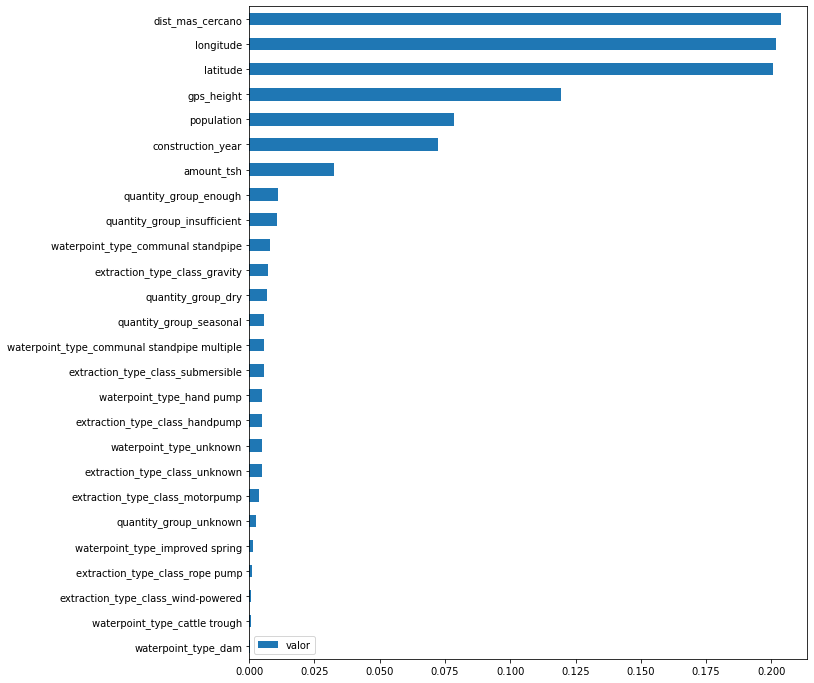

In [6]:
res_features=pd.DataFrame(index=df_train_three.columns.to_list()[:-2],data=rfc.feature_importances_.tolist(),columns=['valor']).sort_values(by='valor',ascending=True)
res_features.plot.barh(figsize=[10,12],)

Clasificador de Kneighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier


# creamos clasificador de Kneighbors
knn = KNeighborsClassifier(n_neighbors=5)
print("clasificador exitoso")

# entrenamos clasificador
knn.fit(X_train2, y_train_2.values.ravel())
print("entrenamiento exitoso")

#predecimos
y_test_pred2=knn.predict(X_test2)
print("predicción realizada")

# Accuracy
accuracy = accuracy_score(y_test_pred2, y_test_2)
print("Accuracy = " + str(accuracy))

# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test_pred2, y_test_2))
print(classification_report(y_test_pred2, y_test_2))

clasificador exitoso
entrenamiento exitoso
predicción realizada
Accuracy = 0.504166040006016
[[10627  9009]
 [ 7475  6134]]
              precision    recall  f1-score   support

           0       0.59      0.54      0.56     19636
           1       0.41      0.45      0.43     13609

    accuracy                           0.50     33245
   macro avg       0.50      0.50      0.49     33245
weighted avg       0.51      0.50      0.51     33245



State vector machine clasificador

In [8]:
from sklearn.svm import SVC

# creamos clasificador de Support Vector Classifier
svc = SVC()
print("clasificador exitoso")

# entrenamos clasificador
svc.fit(X_train2, y_train_2.values.ravel())
print("entrenamiento exitoso")

#predecimos
y_test_pred2=svc.predict(X_test2)
print("predicción realizada")

# Accuracy
accuracy = accuracy_score(y_test_pred2, y_test_2)
print("Accuracy = " + str(accuracy))

# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test_pred2, y_test_2))
print(classification_report(y_test_pred2, y_test_2))

clasificador exitoso
entrenamiento exitoso
predicción realizada
Accuracy = 0.5424875921191157
[[17393 14501]
 [  709   642]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70     31894
           1       0.04      0.48      0.08      1351

    accuracy                           0.54     33245
   macro avg       0.50      0.51      0.39     33245
weighted avg       0.92      0.54      0.67     33245



Clasificador de regresión logística

Este clasificador es sólo para modelos binarios

In [9]:
from sklearn.linear_model import LogisticRegression

# creamos clasificador de regresión logística. (modelo lineal generalizado (GLM))
LR = LogisticRegression( solver='lbfgs', multi_class='ovr')
print("clasificador exitoso")

# entrenamos clasificador
LR.fit(X_train2, y_train_2.values.ravel())
print("entrenamiento exitoso")

#predecimos
y_test_pred2=LR.predict(X_test2)
print("predicción realizada")

# Accuracy
accuracy = accuracy_score(y_test_pred2, y_test_2)
print("Accuracy = " + str(accuracy))

# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test_pred2, y_test_2))
print(classification_report(y_test_pred2, y_test_2))

clasificador exitoso
entrenamiento exitoso
predicción realizada
Accuracy = 0.544412693638141
[[18098 15142]
 [    4     1]]
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     33240
           1       0.00      0.20      0.00         5

    accuracy                           0.54     33245
   macro avg       0.50      0.37      0.35     33245
weighted avg       1.00      0.54      0.70     33245



In [10]:
from sklearn.neural_network import MLPClassifier

# creamos clasificador de red neuronal
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30,10,5,2), max_iter=500)
print("clasificador exitoso")

# entrenamos clasificador
NN.fit(X_train2, y_train_2.values.ravel())
print("entrenamiento exitoso")

#predecimos
y_test_pred2=NN.predict(X_test2)
print("predicción realizada")

# Accuracy
accuracy = accuracy_score(y_test_pred2, y_test_2)
print("Accuracy = " + str(accuracy))

# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_test_pred2, y_test_2))
print(classification_report(y_test_pred2, y_test_2))

clasificador exitoso
entrenamiento exitoso
predicción realizada
Accuracy = 0.4891562640998646
[[ 7477  6358]
 [10625  8785]]
              precision    recall  f1-score   support

           0       0.41      0.54      0.47     13835
           1       0.58      0.45      0.51     19410

    accuracy                           0.49     33245
   macro avg       0.50      0.50      0.49     33245
weighted avg       0.51      0.49      0.49     33245



C:\Users\Rucufuto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
